In [455]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
pd.options.display.max_rows = 4000

In [456]:
df = pd.read_csv('./canadian-hospital-re-admittance-challenge/train.csv')
df

,enc_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission_id
0,88346340,2488608,Caucasian,Male,[60-70),NaN,1,2,6,3,...,No,Steady,No,No,No,No,No,Ch,Yes,2
1,92001408,52133202,Caucasian,Male,[70-80),[100-125),2,6,1,7,...,No,No,No,No,No,No,No,No,Yes,1
2,169424316,40945509,Caucasian,Female,[70-80),NaN,3,2,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,1
3,272987082,38850777,Caucasian,Female,[50-60),NaN,1,1,7,1,...,No,No,No,No,No,No,No,No,Yes,2
4,150600612,72738225,Caucasian,Female,[80-90),NaN,1,6,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,198619164,85063725,Caucasian,Male,[70-80),NaN,1,1,7,6,...,No,No,No,No,No,No,No,No,Yes,1
71232,177404100,86244345,Caucasian,Male,[90-100),NaN,1,3,7,5,...,No,No,No,No,No,No,No,No,No,2
71233,50905206,5131368,Caucasian,Male,[70-80),NaN,3,6,1,6,...,No,Steady,No,No,No,No,No,Ch,Yes,2
71234,216431502,85969035,Hispanic,Male,[50-60),NaN,1,1,4,4,...,No,Steady,No,No,No,No,No,No,Yes,2


In [457]:
percent_missing = df.isnull().sum() * 100 / len(df)

percentages_df = pd.DataFrame({
    'percent_missing': percent_missing
})

percentages_df

,percent_missing
enc_id,0.000000
patient_id,0.000000
race,2.275535
gender,0.000000
age,0.000000
weight,96.841485
admission_type_id,0.000000
discharge_disposition_id,0.000000
admission_source_id,0.000000
time_in_hospital,0.000000


In [458]:
max_glu_serum_group = df.groupby(by=['max_glu_serum'])
max_glu_serum_group.count()['enc_id']

max_glu_serum
>200    1034
>300     897
Norm    1790
Name: enc_id, dtype: int64

In [459]:
a1c_result_group = df.groupby(by=['A1Cresult'])
a1c_result_group.count()['enc_id']

A1Cresult
>7      2689
>8      5715
Norm    3476
Name: enc_id, dtype: int64

In [460]:
specialty_group = df.groupby(by=['medical_specialty'])
specialty_group.count()['enc_id']

medical_specialty
AllergyandImmunology                        6
Anesthesiology                              9
Anesthesiology-Pediatric                   15
Cardiology                               3820
Cardiology-Pediatric                        6
DCPTEAM                                     3
Dentistry                                   4
Dermatology                                 1
Emergency/Trauma                         5305
Endocrinology                              88
Endocrinology-Metabolism                    6
Family/GeneralPractice                   5180
Gastroenterology                          391
Gynecology                                 44
Hematology                                 53
Hematology/Oncology                       151
Hospitalist                                34
InfectiousDiseases                         26
InternalMedicine                        10183
Nephrology                               1156
Neurology                                 143
Neurophysiology 

In [461]:
race_group = df.groupby(by=['race'])
race_group.count()['enc_id']

race
AfricanAmerican    13351
Asian                432
Caucasian          53373
Hispanic            1428
Other               1031
Name: enc_id, dtype: int64

In [462]:
df["max_glu_serum"].fillna("Norm", inplace = True)
df["A1Cresult"].fillna("Norm",inplace=True)
df["medical_specialty"].fillna("No-Admitting-Physician", inplace=True)
df["race"].fillna("Other", inplace=True)

In [463]:
df.drop(columns=['enc_id','patient_id','weight','payer_code'],inplace=True)

In [464]:
percent_missing = df.isnull().sum() * 100 / len(df)

percentages_df = pd.DataFrame({
    'percent_missing': percent_missing
})

percentages_df

,percent_missing
race,0.000000
gender,0.000000
age,0.000000
admission_type_id,0.000000
discharge_disposition_id,0.000000
admission_source_id,0.000000
time_in_hospital,0.000000
medical_specialty,0.000000
num_lab_procedures,0.000000
num_procedures,0.000000


In [465]:
df.loc[df['diag_1'].notnull(), 'diag_1'] = 4
df.loc[df['diag_2'].notnull(), 'diag_2'] = 2
df.loc[df['diag_3'].notnull(), 'diag_3'] = 1

df['diag_1'].fillna(0,inplace=True)
df['diag_2'].fillna(0,inplace=True)
df['diag_3'].fillna(0,inplace=True)

df.loc[:,'diag_1':'diag_3']

,diag_1,diag_2,diag_3
0,4,2,1
1,4,2,1
2,4,2,1
3,4,2,1
4,4,2,1
...,...,...,...
71231,4,2,1
71232,4,2,1
71233,4,2,1
71234,4,2,1


In [466]:
new_col = df['diag_1']+df['diag_2']+df['diag_3']
df.insert(loc = len(df.columns)-1, column = 'Number_of_Diagnosis', value=new_col)

In [467]:
diag_groups = df.groupby(by=['Number_of_Diagnosis'])
diag_groups.count()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission_id
Number_of_Diagnosis,,,,,,,,,,,,,,,,,,,,,
3,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
4,191,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,191
5,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
6,798,798,798,798,798,798,798,798,798,798,...,798,798,798,798,798,798,798,798,798,798
7,70179,70179,70179,70179,70179,70179,70179,70179,70179,70179,...,70179,70179,70179,70179,70179,70179,70179,70179,70179,70179


In [468]:
df.drop(columns=['diag_1','diag_2','diag_3'], inplace=True)

In [469]:
for col in df.loc[:,'metformin':'diabetesMed']:
    med_groups = df.groupby(by=[col])
    print(med_groups.count().iloc[:, 0])

metformin
Down        392
No        57223
Steady    12885
Up          736
Name: race, dtype: int64
repaglinide
Down         33
No        70145
Steady      980
Up           78
Name: race, dtype: int64
nateglinide
Down          8
No        70770
Steady      444
Up           14
Name: race, dtype: int64
chlorpropamide
No        71170
Steady       62
Up            4
Name: race, dtype: int64
glimepiride
Down        131
No        67558
Steady     3308
Up          239
Name: race, dtype: int64
acetohexamide
No        71235
Steady        1
Name: race, dtype: int64
glipizide
Down        376
No        62301
Steady     8011
Up          548
Name: race, dtype: int64
glyburide
Down        389
No        63713
Steady     6577
Up          557
Name: race, dtype: int64
tolbutamide
No        71221
Steady       15
Name: race, dtype: int64
pioglitazone
Down         83
No        66074
Steady     4910
Up          169
Name: race, dtype: int64
rosiglitazone
Down         67
No        66740
Steady     4303
Up      

In [470]:
df.drop(columns=['chlorpropamide', 'tolbutamide', 'miglitol', 'tolazamide', 'acetohexamide', 'troglitazone', 'examide', 'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'], inplace=True)
df.columns.size

32

<Axes: >

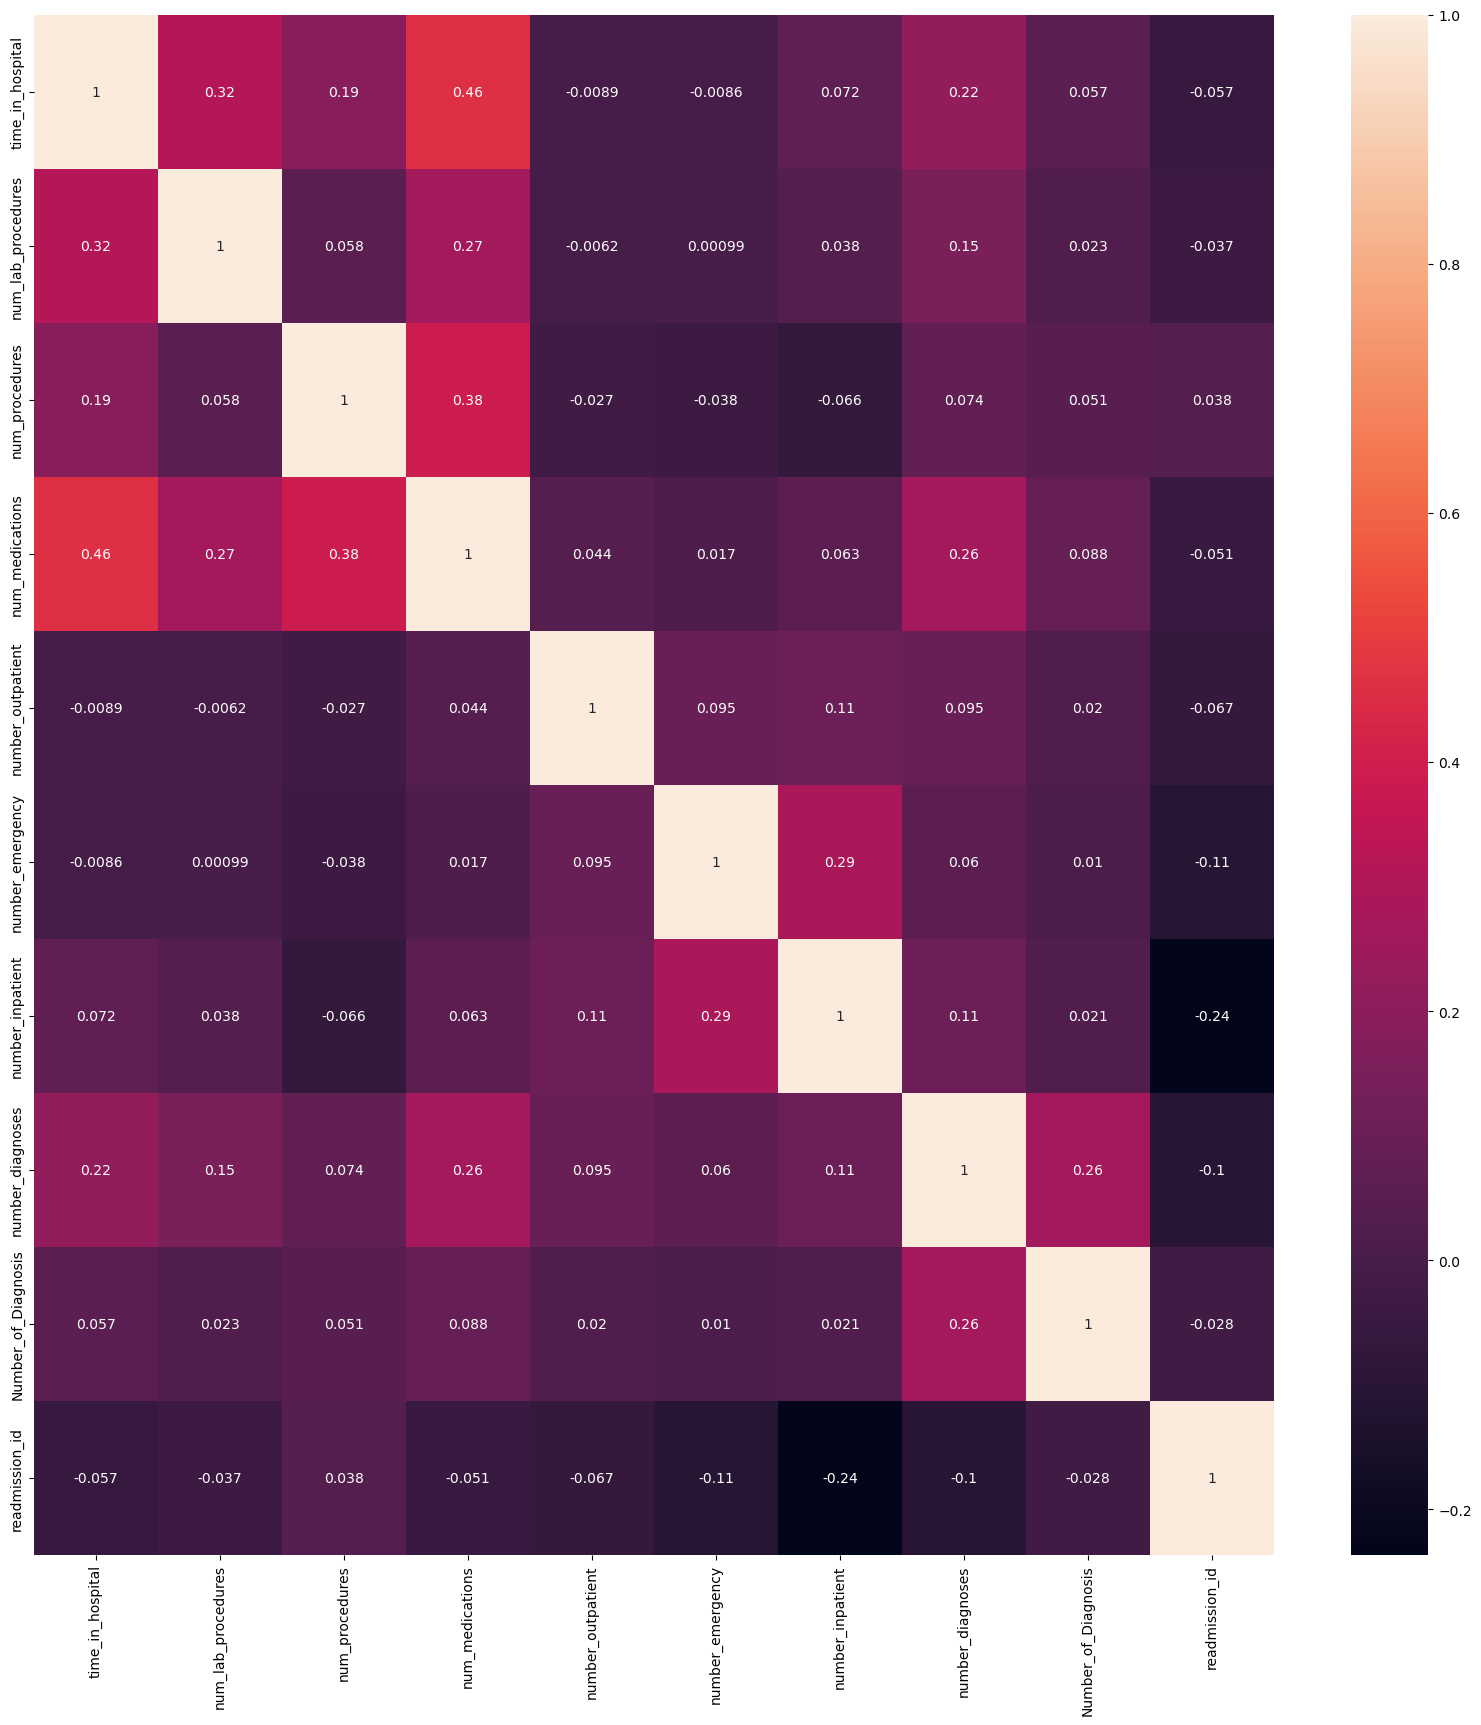

In [471]:
plt.figure(figsize=(20,20))
corr = df.loc[:, ["time_in_hospital","num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient","number_diagnoses","Number_of_Diagnosis","readmission_id"]].corr()
sns.heatmap(corr,annot=True)

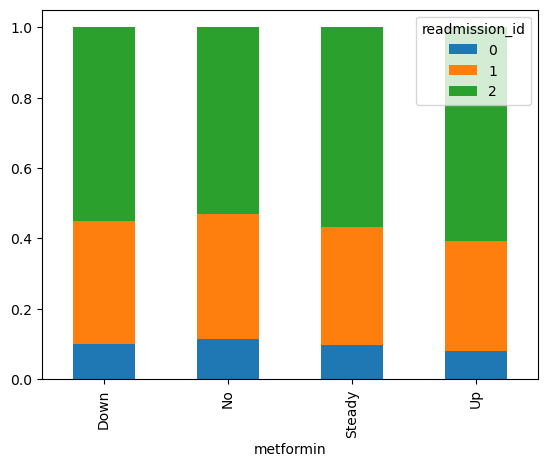

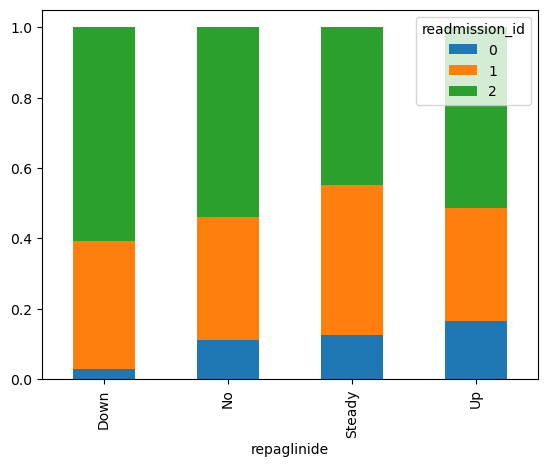

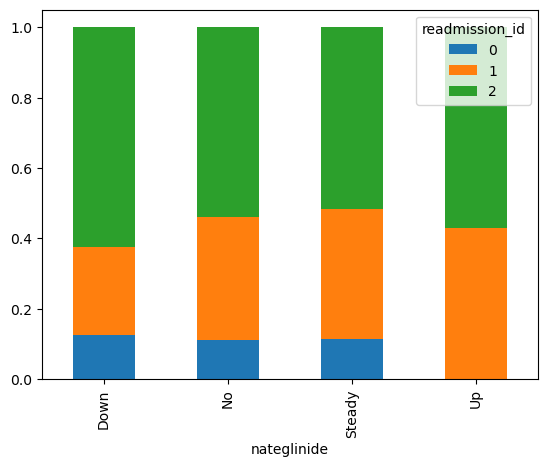

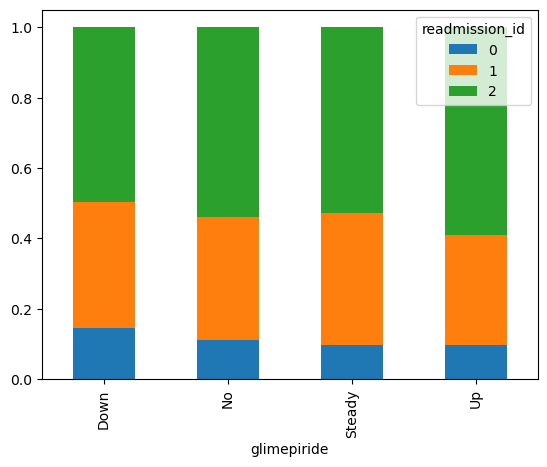

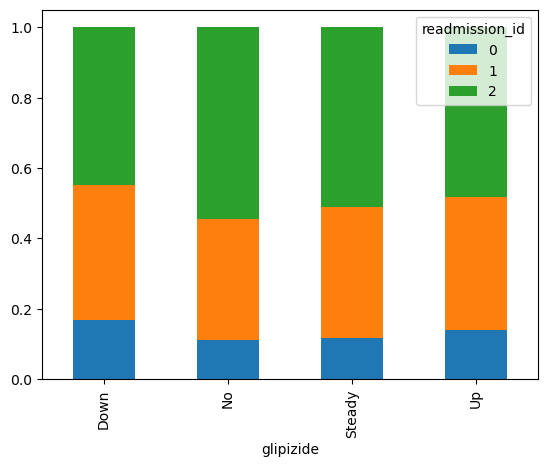

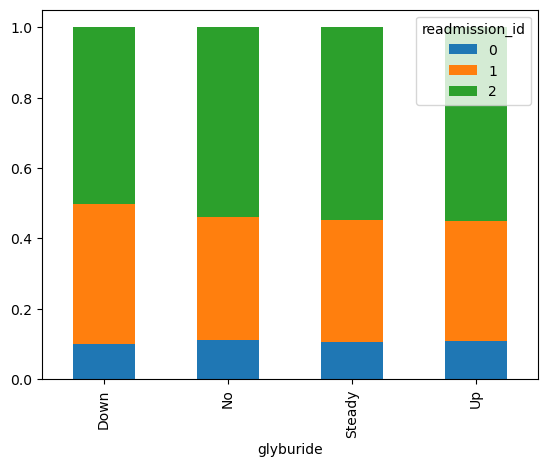

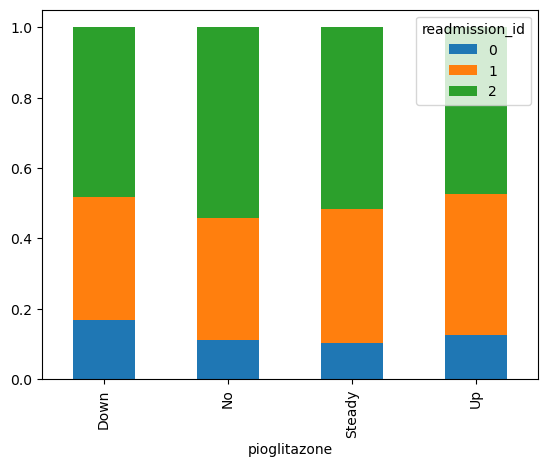

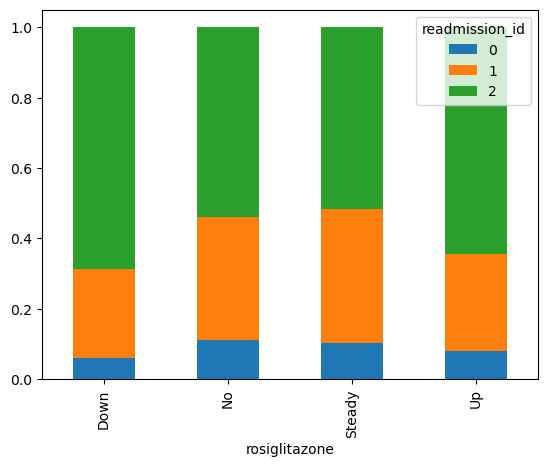

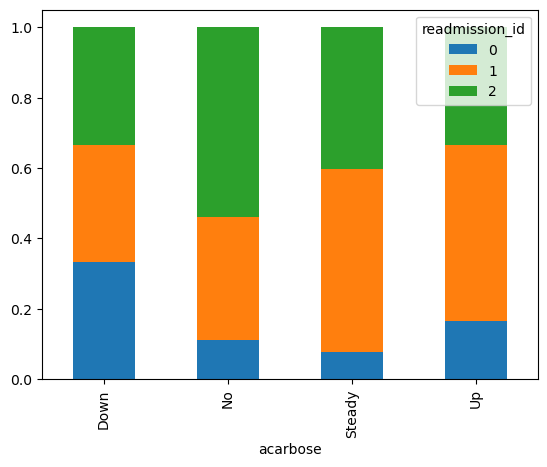

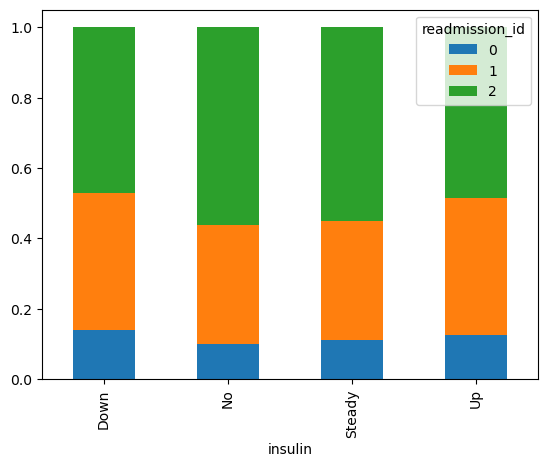

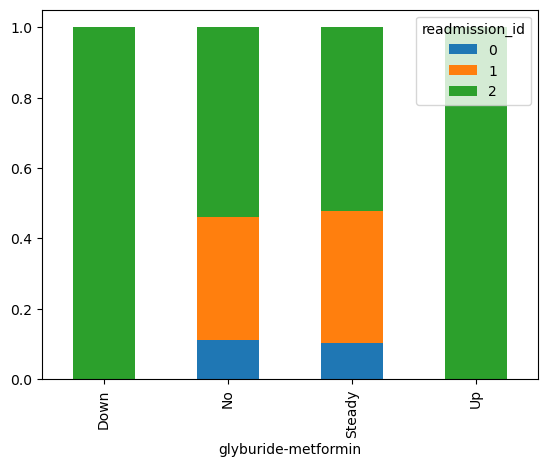

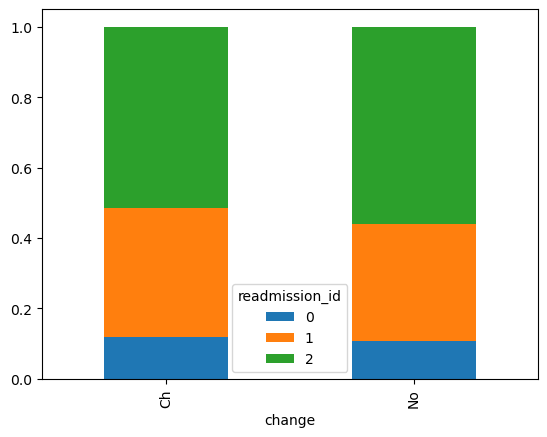

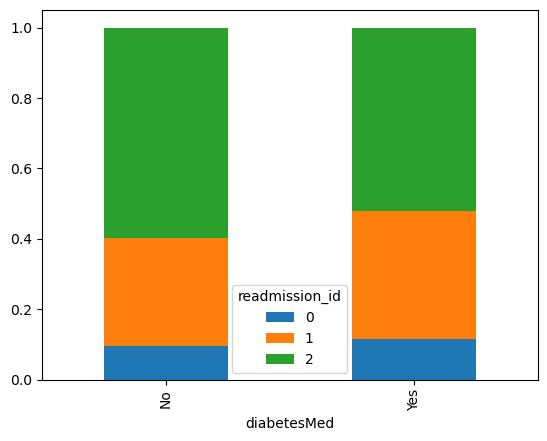

In [472]:
for col in df.loc[:,'metformin':'diabetesMed']:
    df_grouped = df.groupby(by=col)['readmission_id'].value_counts(normalize=True).unstack('readmission_id')
    df_grouped.plot.bar(stacked=True)

<Axes: xlabel='race'>

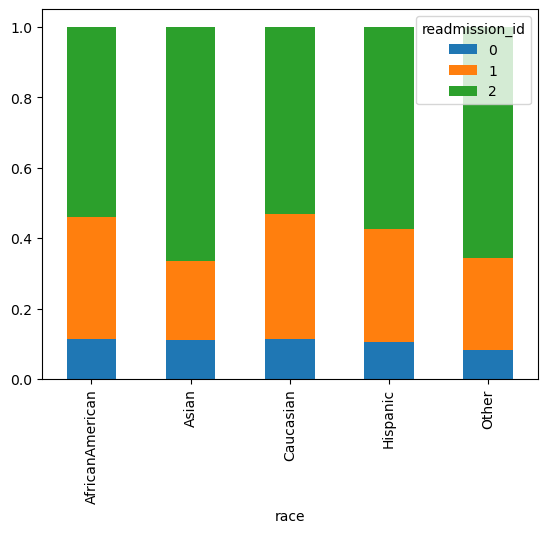

In [473]:
df_grouped = df.groupby(by=['race'])['readmission_id'].value_counts(normalize=True).unstack('readmission_id')
df_grouped.plot.bar(stacked=True)

<Axes: xlabel='gender'>

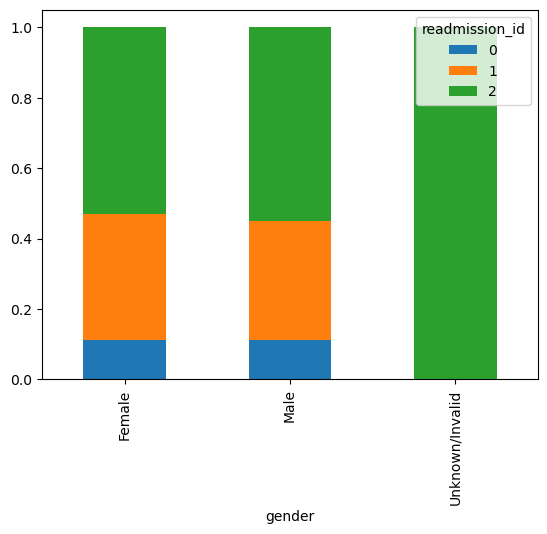

In [474]:
df_grouped = df.groupby(by=['gender'])['readmission_id'].value_counts(normalize=True).unstack('readmission_id')
df_grouped.plot.bar(stacked=True)

<Axes: xlabel='age'>

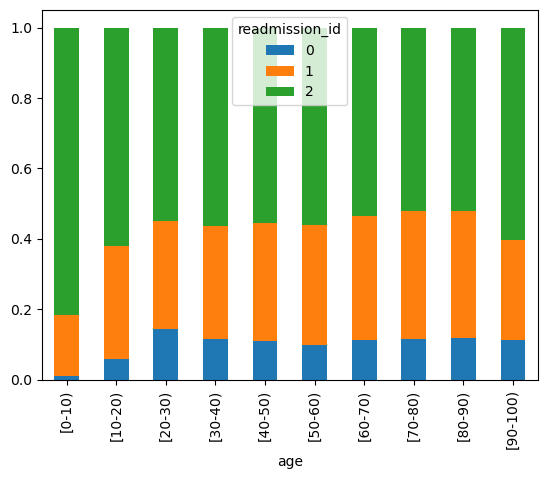

In [475]:
df_grouped = df.groupby(by=['age'])['readmission_id'].value_counts(normalize=True).unstack('readmission_id')
df_grouped.plot.bar(stacked=True)

In [476]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'Number_of_Diagnosis',
       'readmission_id'],
      dtype='object')

In [477]:
input = df.loc[:, "race":"Number_of_Diagnosis"]
labels = df.loc[:, "readmission_id"]

In [478]:
input_encoded = pd.get_dummies(input, columns=['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'Number_of_Diagnosis'])

input_encoded.columns

Index(['num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian',
       ...
       'glyburide-metformin_Up', 'change_Ch', 'change_No', 'diabetesMed_No',
       'diabetesMed_Yes', 'Number_of_Diagnosis_3', 'Number_of_Diagnosis_4',
       'Number_of_Diagnosis_5', 'Number_of_Diagnosis_6',
       'Number_of_Diagnosis_7'],
      dtype='object', length=218)

In [481]:
X_train,X_test,Y_train,Y_test = train_test_split(input_encoded, labels, test_size=0.25, random_state=42)

In [482]:
lr = LogisticRegression(random_state=42, multi_class="multinomial")
lr.fit(X_train,Y_train)

y_pred = lr.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.5729125722949071


/home/srinivasan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [483]:
nb = GaussianNB()
nb.fit(X_train,Y_train)

y_pred = nb.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.17244090066820147


In [484]:
tree = DecisionTreeClassifier(max_depth=20,random_state=42)
tree.fit(X_train,Y_train)

y_pred = tree.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.5364141726093549


In [485]:
rf = RandomForestClassifier(max_depth=20,random_state=42)
rf.fit(X_train,Y_train)

y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.5779661968667528


In [488]:
gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=4,random_state=42)
gbc.fit(X_train,Y_train)


y_pred = gbc.predict(X_test)
print(accuracy_score(y_pred, Y_test))

0.5833005783592565
